In [1]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tslearn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import ast
from sklearn.decomposition import PCA
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

In [4]:
time_series_path = "C:\\Users\\tigra\\OneDrive\\Documents\\cleaned_df_1.xlsx"

In [5]:

time_series_data = pd.read_excel(time_series_path)

time_series_data

,identifier,bearing,split,Millisec,timestamp,channel_x,channel_y,channel_x_z_scores,channel_x_anomalies,channel_y_z_scores,channel_y_anomalies
0,Bearing1_1,0,0,"[65703.0, 65742.0, 65781.0, 65820.0, 65859.0, ...",9:39:39,"[0.8860844826676183, 0.23987808309929515, -0.7...","[-1.097050883581788, 1.0021835283362464, 0.554...",[ 0.88608448 0.23987808 -0.75880453 ... -1.58...,True,[-1.09705088 1.00218353 0.5548057 ... -0.34...,True
1,Bearing1_1,0,0,"[65703.0, 65742.0, 65781.0, 65820.0, 65859.0, ...",9:39:49,"[-0.3132895665726797, -0.01432467106317288, 0....","[0.7455526428911481, -0.919337596225791, 0.978...",[-0.31328957 -0.01432467 0.05854802 ... -0.58...,True,[ 0.74555264 -0.9193376 0.97830477 ... -0.66...,True
2,Bearing1_1,0,0,"[65703.0, 65742.0, 65781.0, 65820.0, 65859.0, ...",9:39:59,"[-0.19410874831918817, -0.29199472812529986, -...","[0.35011174510322646, -0.4537091557969802, -1....",[-0.19410875 -0.29199473 -0.68165622 ... -1.03...,True,[ 0.35011175 -0.45370916 -1.36799667 ... 1.15...,True
3,Bearing1_1,0,0,"[65703.0, 65742.0, 65781.0, 65820.0, 65859.0, ...",9:40:9,"[0.09333887645063953, -0.011177511606281465, 0...","[-2.119279517849336, 0.4437364411866395, -0.41...",[ 0.09333888 -0.01117751 0.02846664 ... -0.69...,True,[-2.11927952 0.44373644 -0.41808329 ... 0.41...,True
4,Bearing1_1,0,0,"[65703.0, 65742.0, 65781.0, 65820.0, 65859.0, ...",9:40:19,"[-0.3346322387699386, 0.212431330417246, 0.568...","[2.031691718185553, 0.36801172011007116, -0.76...",[-0.33463224 0.21243133 0.56890501 ... 2.20...,True,[ 2.03169172 0.36801172 -0.76234675 ... 1.53...,True
...,...,...,...,...,...,...,...,...,...,...,...
2798,Bearing1_1,0,0,"[65703.0, 65742.0, 65781.0, 65820.0, 65859.0, ...",17:25:59,"[0.05713032549626286, 0.016732032516360594, -0...","[-0.25858087971563787, 0.45116901805373716, 1....",[ 0.05713033 0.01673203 -0.13129566 ... -0.34...,True,[-0.25858088 0.45116902 1.37183709 ... 0.21...,True
2799,Bearing1_1,0,0,"[65703.0, 65742.0, 65781.0, 65820.0, 65859.0, ...",17:26:9,"[0.7842501126526159, 0.6485894691611812, 0.884...","[-0.8001867617809294, -0.6901360986510627, 0.2...",[ 0.78425011 0.64858947 0.88429726 ... -0.12...,True,[-0.80018676 -0.6901361 0.2612387 ... -0.61...,True
2800,Bearing1_1,0,0,"[65703.0, 65742.0, 65781.0, 65820.0, 65859.0, ...",17:26:19,"[0.5422453850103686, 0.9750843589341068, 0.613...","[0.07084081029417516, -0.5857894139630274, -0....",[ 0.54224539 0.97508436 0.61357319 ... -0.34...,True,[ 0.07084081 -0.58578941 -0.29124455 ... -0.48...,True
2801,Bearing1_1,0,0,"[65703.0, 65742.0, 65781.0, 65820.0, 65859.0, ...",17:26:29,"[-0.10058150440392005, 0.17432176260125978, 0....","[-1.4610299060277312, 0.14011139170340847, 2.7...",[-0.1005815 0.17432176 0.69697147 ... -0.44...,True,[-1.46102991 0.14011139 2.75903243 ... -0.24...,True


In [6]:
#Drop unnecessary columns

time_series_data = time_series_data.drop(columns=['identifier' ,'bearing', 'split' , 'Millisec' , 'channel_x_z_scores' , 'channel_x_anomalies', 'channel_y_z_scores' , 'channel_y_anomalies'])

time_series_data

,timestamp,channel_x,channel_y
0,9:39:39,"[0.8860844826676183, 0.23987808309929515, -0.7...","[-1.097050883581788, 1.0021835283362464, 0.554..."
1,9:39:49,"[-0.3132895665726797, -0.01432467106317288, 0....","[0.7455526428911481, -0.919337596225791, 0.978..."
2,9:39:59,"[-0.19410874831918817, -0.29199472812529986, -...","[0.35011174510322646, -0.4537091557969802, -1...."
3,9:40:9,"[0.09333887645063953, -0.011177511606281465, 0...","[-2.119279517849336, 0.4437364411866395, -0.41..."
4,9:40:19,"[-0.3346322387699386, 0.212431330417246, 0.568...","[2.031691718185553, 0.36801172011007116, -0.76..."
...,...,...,...
2798,17:25:59,"[0.05713032549626286, 0.016732032516360594, -0...","[-0.25858087971563787, 0.45116901805373716, 1...."
2799,17:26:9,"[0.7842501126526159, 0.6485894691611812, 0.884...","[-0.8001867617809294, -0.6901360986510627, 0.2..."
2800,17:26:19,"[0.5422453850103686, 0.9750843589341068, 0.613...","[0.07084081029417516, -0.5857894139630274, -0...."
2801,17:26:29,"[-0.10058150440392005, 0.17432176260125978, 0....","[-1.4610299060277312, 0.14011139170340847, 2.7..."


In [7]:
#Truncate the data

time_series_data = time_series_data.iloc[::8].reset_index(drop=True)

time_series_data

,timestamp,channel_x,channel_y
0,9:39:39,"[0.8860844826676183, 0.23987808309929515, -0.7...","[-1.097050883581788, 1.0021835283362464, 0.554..."
1,9:40:59,"[-0.08086521122750613, -0.12853326319653705, -...","[1.2535650172902353, 1.3827249950177891, -0.70..."
2,9:42:19,"[0.09844131222694276, -0.3097673082449509, -0....","[-0.36120217028678075, -0.00045544721102539095..."
3,9:43:39,"[1.1022794740357766, 2.2080786183621757, 2.983...","[-0.6581173708818574, 0.3507066231679465, -0.7..."
4,9:44:59,"[0.1076645089688699, 0.826312613459056, 0.4053...","[0.36327748876166416, -1.4744076437828253, -0...."
...,...,...,...
346,17:20:59,"[0.4832720347270393, 0.5531578799370614, 0.362...","[0.5141641036538974, -0.13874648636339187, -0...."
347,17:22:19,"[0.5162167953497245, 1.0863305900760678, 0.522...","[-0.9550222798447221, -1.3344866010239413, 0.1..."
348,17:23:39,"[0.1846901513614015, 0.6975443285505136, 0.647...","[1.5451198766417797, -0.29735584077395544, -0...."
349,17:24:59,"[-0.3976134300612936, -0.22452486779599634, 1....","[-0.771584171010862, -1.5341202325899057, -2.4..."


In [8]:
#Some of the time series do not have a closing bracket ]. Making a function to add that
#Some other time series end with just a negative sign after a comma. Making a function to fix that as well.

def fix_list_string(s):
    if s.startswith("[") and not s.endswith("]"):
        s += "]" 

    if s.endswith(", -"):
        s = s[:-3]

    if s.endswith(", -]"):
        s = s[:-3]
        s += "]"
        
    return s

In [9]:
#Apply the fix
time_series_data['channel_x'] = time_series_data['channel_x'].apply(fix_list_string)
time_series_data['channel_y'] = time_series_data['channel_y'].apply(fix_list_string)

In [10]:
#Convert string to list
time_series_data['channel_x'] = time_series_data['channel_x'].apply(ast.literal_eval)
time_series_data['channel_y'] = time_series_data['channel_y'].apply(ast.literal_eval)

In [11]:
#Find the length of the shortest time series
min_length = min(time_series_data['channel_x'].apply(len).min(),
                 time_series_data['channel_y'].apply(len).min())

#Function to truncate lists to the minimum length
def truncate_to_min_length(lst, min_length):
    return lst[:min_length]

#Apply truncation to 'channel_x' and 'channel_y'
time_series_data['channel_x'] = time_series_data['channel_x'].apply(lambda x: truncate_to_min_length(x, min_length))
time_series_data['channel_y'] = time_series_data['channel_y'].apply(lambda y: truncate_to_min_length(y, min_length))

In [12]:
for list in time_series_data['channel_x']:
    print(len(list))

1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554
1554


In [13]:
#Store'channel_x' and 'channel_y' columns as lists
data_x = np.array(time_series_data['channel_x'].tolist())
data_y = np.array(time_series_data['channel_y'].tolist())

In [14]:
# Initialize TimeSeriesKMeans with DTW metric for 4 clusters
model_x = TimeSeriesKMeans(n_clusters=4, metric="dtw", random_state=0)
model_y = TimeSeriesKMeans(n_clusters=4, metric="dtw", random_state=0)

In [15]:
# Fit the model and predict clusters
clusters_x = model_x.fit_predict(data_x)
clusters_y = model_y.fit_predict(data_y)

In [16]:
# Add clusters back to the DataFrame
time_series_data['cluster_x'] = clusters_x
time_series_data['cluster_y'] = clusters_y

In [17]:
time_series_data

,timestamp,channel_x,channel_y,cluster_x,cluster_y
0,9:39:39,"[0.8860844826676183, 0.23987808309929515, -0.7...","[-1.097050883581788, 1.0021835283362464, 0.554...",3,3
1,9:40:59,"[-0.08086521122750613, -0.12853326319653705, -...","[1.2535650172902353, 1.3827249950177891, -0.70...",3,3
2,9:42:19,"[0.09844131222694276, -0.3097673082449509, -0....","[-0.36120217028678075, -0.00045544721102539095...",3,3
3,9:43:39,"[1.1022794740357766, 2.2080786183621757, 2.983...","[-0.6581173708818574, 0.3507066231679465, -0.7...",3,3
4,9:44:59,"[0.1076645089688699, 0.826312613459056, 0.4053...","[0.36327748876166416, -1.4744076437828253, -0....",3,3
...,...,...,...,...,...
346,17:20:59,"[0.4832720347270393, 0.5531578799370614, 0.362...","[0.5141641036538974, -0.13874648636339187, -0....",2,3
347,17:22:19,"[0.5162167953497245, 1.0863305900760678, 0.522...","[-0.9550222798447221, -1.3344866010239413, 0.1...",2,3
348,17:23:39,"[0.1846901513614015, 0.6975443285505136, 0.647...","[1.5451198766417797, -0.29735584077395544, -0....",2,2
349,17:24:59,"[-0.3976134300612936, -0.22452486779599634, 1....","[-0.771584171010862, -1.5341202325899057, -2.4...",2,3


In [18]:
cluster_x = time_series_data['cluster_x'].tolist()
cluster_y = time_series_data['cluster_y'].tolist()

In [19]:
def fix_timestamp_format(ts):
    # Check if the timestamp is in HH:MM:SS format
    parts = ts.split(":")
    # Ensure minutes and seconds have two digits each
    if len(parts) == 3:
        hour, minute, second = parts
        minute = minute.zfill(2)  #Add leading zero if missing
        second = second.zfill(2)  #Add leading zero if missing
        return f"{hour}:{minute}:{second}"
    return ts  
    
time_series_data['timestamp'] = time_series_data['timestamp'].apply(fix_timestamp_format)

C:\Users\tigra\AppData\Local\Temp\ipykernel_15704\1303538284.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_data['timestamp'] = pd.to_datetime(time_series_data['timestamp'])


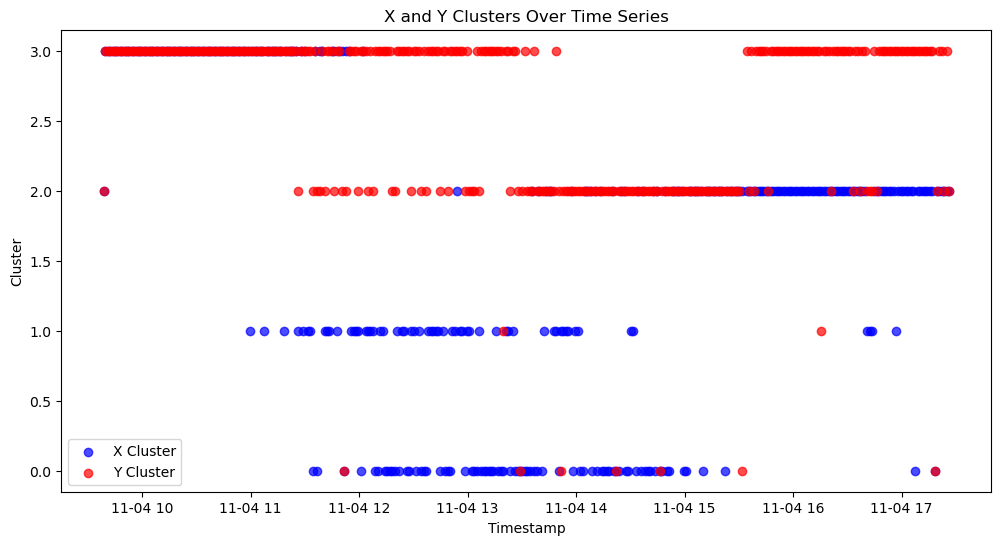

In [20]:
#Visualize clusters

time_series_data['timestamp'] = pd.to_datetime(time_series_data['timestamp'])

plt.figure(figsize=(12, 6))

# Plot x cluster over time as dots
plt.scatter(time_series_data['timestamp'], time_series_data['cluster_x'], label='X Cluster', color='blue', alpha=0.7)

# Plot y cluster over time as dots
plt.scatter(time_series_data['timestamp'], time_series_data['cluster_y'], label='Y Cluster', color='red', alpha=0.7)

# Labels and title
plt.xlabel("Timestamp")
plt.ylabel("Cluster")
plt.title("X and Y Clusters Over Time Series")
plt.legend()

# Show plot
plt.show()